In [1]:
from time import time
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


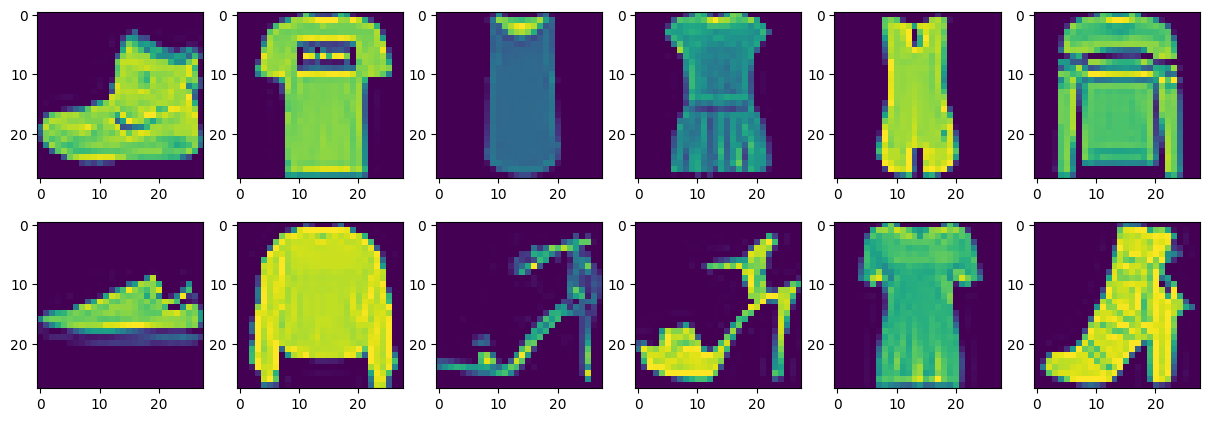

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
  ax[i].imshow(training_images[i].reshape(28,28))

plt.show()

In [4]:
training_images=training_images / 255.0
test_images=test_images / 255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
t1=time()
model.fit(training_images, training_labels, epochs=10)
t2=time()

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4826 - accuracy: 0.8299
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3642 - accuracy: 0.8677
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3262 - accuracy: 0.8807
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3025 - accuracy: 0.8883
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2854 - accuracy: 0.8947
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.8994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9039
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2454 - accuracy: 0.9081
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2370 - accuracy: 0.9118
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.226

In [8]:
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))


Training wall clock time: 83.509 seconds



In [9]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8779

Test accuracy:  0.8779000043869019


In [10]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [20]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [22]:
t1=time()
history=model2.fit(training_images, training_labels, epochs=5)
t2=time()


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4378 - accuracy: 0.8410
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2931 - accuracy: 0.8931
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2507 - accuracy: 0.9078
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2164 - accuracy: 0.9196
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1908 - accuracy: 0.9275


In [23]:
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))


Training wall clock time: 37.512 seconds



In [24]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8899

Test accuracy:  0.8899000287055969


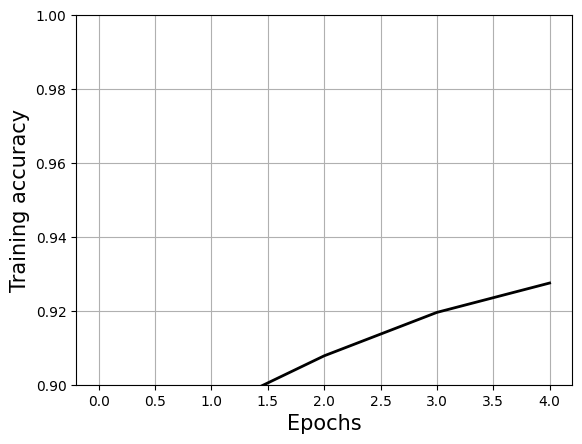

In [25]:
plt.plot(history.history['accuracy'],c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.ylim(0.9,1.0)
plt.show()

In [26]:
#Excercise
#1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.


In [27]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1845 - accuracy: 0.9309
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1780 - accuracy: 0.9333
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1

In [28]:
#2. Remove the final Convolution. What impact will this have on accuracy or training time?

model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1575 - accuracy: 0.9408
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1557 - accuracy: 0.9422
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1

In [31]:
#3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1402 - accuracy: 0.9467
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1342 - accuracy: 0.9493
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1

In [32]:
#4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9528
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1200 - accuracy: 0.9549
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1

In [34]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.1001 - accuracy: 0.9620
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1010 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0